# Reddit Project on Data Science

This project is to web scrape data science related information from Reddit, the social news aggregation, web content rating, and discussion website. We aim to collect general in

In [1]:
# Load necessary libraries
import praw
import pandas as pd
import PIL
from wordcloud import WordCloud
from datetime import datetime
from praw.models import MoreComments

### Authentication
First, we need to authenticate ourselves. In order to authenticate ourselves, we need to first create an app on reddit by filling in a name, description and redirect uri. After creating the app, we can use the authentication information to create the praw.Reddit instance. 

In [2]:
# we need to first authenticate ourselves
reddit = praw.Reddit(client_id='Z1grqQBW7ei7hA', client_secret='ekx286gd903s742SoxFSc7mF-kg', 
                     user_agent='simon_tutorial', redirect_uri="http://localhost:8080", username='simonneedsleep', 
                     password='ZXW1025reddit!')

# check the username
print(reddit.user.me())

simonneedsleep


### Get subreddit data
For the next step, we need to collect subreddit on data science relevant topics. The subreddits that we want to explore are r/DataScience, r/DataScienceJobs, r/MachineLearning, etc. 

In [3]:
## Scrape the DataScience subreddit
posts = []
ds_subreddit = reddit.subreddit('DataScience')
# Obtain the top 20 comments from the hot comments
for post in ds_subreddit.hot(limit=20):
    # convert timestamp to datetime
    posts.append([post.title, post.score, post.id, post.subreddit, post.url, post.num_comments, post.selftext, datetime.fromtimestamp(post.created)])
posts = pd.DataFrame(posts,columns=['title', 'score', 'id', 'subreddit', 'url', 'num_comments', 'body', 'created'])

We then want to display the top 20 hot posts:

In [84]:
posts['title'][1]

# Get the info of the post
#posts.info()
posts

,title,score,id,subreddit,url,num_comments,body,created
0,Weekly Entering & Transitioning Thread | 16 Au...,3,iar5jt,datascience,https://www.reddit.com/r/datascience/comments/...,64,Welcome to this week's entering & transitionin...,2020-08-16 16:00:30
1,"What are your favorite courses on Statistics, ...",116,idq7dj,datascience,https://www.reddit.com/r/datascience/comments/...,44,I'm at a point in my DS learning where I just ...,2020-08-21 08:38:11
2,Building Beautiful Interactive Graphs in R,7,idxern,datascience,https://www.reddit.com/r/datascience/comments/...,0,If you've ever felt limited by how much you ca...,2020-08-21 18:09:29
3,I suck as a data analyst. Should I leave the f...,288,idapmz,datascience,https://www.reddit.com/r/datascience/comments/...,127,I always find myself making mistakes. I’ve bee...,2020-08-20 17:54:54
4,Kite on Jupyter lab,3,idxbob,datascience,https://www.reddit.com/r/datascience/comments/...,6,Hi there!\n\n&#x200B;\n\nI have recently start...,2020-08-21 18:04:42
5,Is there an 'industry standard' minimum amount...,10,idom1f,datascience,https://www.reddit.com/r/datascience/comments/...,9,Been at my first job out of grad school for ~3...,2020-08-21 06:48:13
6,Data scientists in social fields?,14,idl291,datascience,https://www.reddit.com/r/datascience/comments/...,16,Hey all! I've been taking the IBM Data Science...,2020-08-21 03:05:30
7,How important is a github portfolio?,11,idk7ib,datascience,https://www.reddit.com/r/datascience/comments/...,23,"I have 1 year experience as a data analyst, wh...",2020-08-21 02:17:29
8,Route to DS/ML for a programmer without extens...,0,idu7pn,datascience,https://www.reddit.com/r/datascience/comments/...,4,"Hello all,\n\nI'm a self taught programmer who...",2020-08-21 14:23:21
9,Data Scientist in Health,4,ido6wd,datascience,https://www.reddit.com/r/datascience/comments/...,7,Hi y'all\nSo I've been reading about data scie...,2020-08-21 06:20:42


### Get comments from a specific post
After collecting the subreddit, we then want to get comments from a specific post. 

In [4]:
# Get the comments by id
submission = reddit.submission(id="iar5jt")

for top_level_comment in submission.comments:
    print(top_level_comment.body)

I am trying to change careers from a Research Biomedical Engineer to Data Science. I have been working in my field for 4 years, I am published, and also have conference posters. I have good foundations on MATLAB, Python and am fairly exposed to other languges but not as proficient.
 I took online courses to supplement my knowledge (Udacity: ML Engineering, Data Science , Coursera: ML, Deep Learning Specialization). Thus I know quite a bit of the Python stack for data science, and I learned some PySpark and SQL. Thinking of maybe doing some PowerBI work, that might help my chances.
I would be applying to change careers after 4-5 months, in the mean time I want to beef up my resume, and maybe even volunteer my skills for projects that are for the "good" of the people. Any career advice is appreciated, thanks!

Github: https://github.com/armand-hoxha25
Link to my resume: https://drive.google.com/file/d/1iCKQEPjBdMgzCyxGEGVx2QbnGDegnGe8/view?usp=sharing

I know a resume has to be tailored 

In [5]:
# Store the comments in a dictionary for the subreddit CHANGE the representation to df
# CHECK: whether a comment is a comment to a comment
dict_comments = {}

# Get the id of the post
keys = posts.id
for key in keys:
    submission = reddit.submission(id = key)
    for top_level_comment in submission.comments:
        try:
            dict_comments[key].append(top_level_comment.body)
        except KeyError:
            dict_comments[key] = [top_level_comment.body]

In [87]:
# print out the dictionary
df_comments_raw

#df_comments

,ID,Comments,Tokens
0,iar5jt,trying change careers research biomedical engi...,"[trying, change, careers, research, biomedical..."
1,idq7dj,something like islesl text would give statisti...,"[something, like, islesl, text, would, give, s..."
2,idapmz,better building something checking numbers exa...,"[better, building, something, checking, number..."
3,idxbob,hey poissonza love username would way helpful ...,"[hey, poissonza, love, username, would, way, h..."
4,idom1f,minimum 1yr 2yrs ideal minimally cross calenda...,"[minimum, 1yr, 2yrs, ideal, minimally, cross, ..."
5,idl291,doesnt directly answer question policycommunit...,"[doesnt, directly, answer, question, policycom..."
6,idk7ib,phone interview day interviewer clearly curren...,"[phone, interview, day, interviewer, clearly, ..."
7,idu7pn,happy cake day op think basic calc iii get int...,"[happy, cake, day, op, think, basic, calc, iii..."
8,ido6wd,yes formulating data science idea start proble...,"[yes, formulating, data, science, idea, start,..."
9,idtc8z,see youve posted github link jupyter notebook ...,"[see, youve, posted, github, link, jupyter, no..."


In [49]:
# Flatten the dictionary to a dataframe
df_comments_raw = pd.DataFrame(list(dict_comments.items()), columns=['ID', 'Comments'])
#df['Date'] = pd.to_datetime(df['Date'])
# Take a look at these comments
#print(df_comments_raw)

# Transform each element of a list-like to a row, replicating index values
df_comments = df_comments_raw.explode('Comments')
#print(df_comments)

In [51]:
### Preprocessing
import re
## Join the list of string into one long string:
df_comments_raw['Comments'] = df_comments_raw['Comments'].str.join(' ')

## Remove empty space:
df_comments_raw['Comments'] = df_comments_raw['Comments'].map(lambda x: re.sub('\s+', ' ', x))

## Convert all string to lower cases:
df_comments_raw['Comments'] = df_comments_raw['Comments'].str.lower()

## Remove all the punctuations:
df_comments_raw['Comments'] = df_comments_raw['Comments'].map(lambda x: re.sub('[^\w\s]', '', x))

## Remove stopwords
stop_words = ['i','me','my','myself','we','our','ours','ourselves','you','your','yours','yourself',
            'yourselves','he','him','his','himself','she','her','hers','herself','it','its','itself',
            'they','them','their','theirs','themselves','what','which','who','whom','this','that',
            'these','those','am','is','are','was','were','be','been','being','have','has','had',
            'having','do','does','did','doing','a','an','the','and','but','if','or','because','as',
            'until','while','of','at','by','for','with','about','against','between','into','through',
            'during','before','after','above','below','to','from','up','down','in','out','on','off',
            'over','under','again','further','then','once','here','there','when','where','why','how',
            'all','any','both','each','few','more','most','other','some','such','no','nor','not',
            'only','own','same','so','than','too','very','s','t','can','will','just','don','should',
            'now','uses','use','using','used','one','also']

df_comments_raw['Comments'] = df_comments_raw['Comments'].map(lambda text: " ".join(word for word in text.split() if word not in stop_words))

In [65]:
import nltk
from nltk.tokenize import word_tokenize 
nltk.download('punkt')

# tokenize the words
df_comments_raw['Tokens'] = df_comments_raw['Comments'].map(lambda x: word_tokenize(x))

# 

[nltk_data] Downloading package punkt to /Users/simon/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


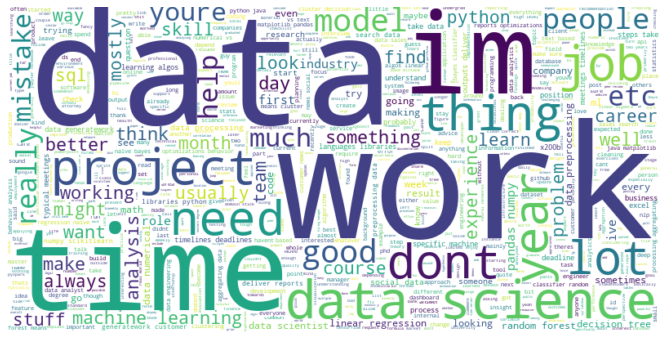

In [83]:
from wordcloud import WordCloud
wc = WordCloud(background_color="white", max_words=2000, width=800, height = 400)
# generate word cloud
wc.generate(' '.join(df_comments_raw['Comments']))

import matplotlib.pyplot as plt
%matplotlib inline

# show
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [61]:
from textblob import TextBlob
TextBlob(df_comments_raw['Comments'][0]).ngrams(2)

[WordList(['trying', 'change']),
 WordList(['change', 'careers']),
 WordList(['careers', 'research']),
 WordList(['research', 'biomedical']),
 WordList(['biomedical', 'engineer']),
 WordList(['engineer', 'data']),
 WordList(['data', 'science']),
 WordList(['science', 'working']),
 WordList(['working', 'field']),
 WordList(['field', '4']),
 WordList(['4', 'years']),
 WordList(['years', 'published']),
 WordList(['published', 'conference']),
 WordList(['conference', 'posters']),
 WordList(['posters', 'good']),
 WordList(['good', 'foundations']),
 WordList(['foundations', 'matlab']),
 WordList(['matlab', 'python']),
 WordList(['python', 'fairly']),
 WordList(['fairly', 'exposed']),
 WordList(['exposed', 'languges']),
 WordList(['languges', 'proficient']),
 WordList(['proficient', 'took']),
 WordList(['took', 'online']),
 WordList(['online', 'courses']),
 WordList(['courses', 'supplement']),
 WordList(['supplement', 'knowledge']),
 WordList(['knowledge', 'udacity']),
 WordList(['udacity', '

In [89]:
## Word Frequency
from nltk.probability import FreqDist # this also uses Counter. 
for i in range(df_comments_raw.shape[0]):
    print(FreqDist(df_comments_raw['Tokens'][i]).most_common(8))

[('data', 89), ('science', 38), ('im', 33), ('would', 29), ('job', 18), ('analytics', 16), ('python', 15), ('work', 15)]
[('really', 10), ('math', 9), ('linear', 8), ('algebra', 7), ('statistics', 6), ('ml', 6), ('data', 6), ('well', 6)]
[('data', 53), ('mistakes', 42), ('work', 37), ('time', 29), ('dont', 28), ('make', 25), ('better', 23), ('youre', 23)]
[('way', 4), ('kite', 4), ('provide', 3), ('get', 3), ('help', 3), ('hey', 2), ('would', 2), ('us', 2)]
[('years', 12), ('job', 8), ('year', 8), ('would', 6), ('two', 6), ('jobs', 4), ('first', 4), ('think', 4)]
[('data', 9), ('science', 6), ('work', 5), ('would', 3), ('organizations', 3), ('social', 3), ('policy', 3), ('works', 3)]
[('github', 14), ('work', 9), ('experience', 8), ('project', 7), ('projects', 6), ('dont', 6), ('portfolio', 6), ('hiring', 5)]
[('data', 6), ('think', 4), ('ds', 3), ('youre', 3), ('help', 3), ('calc', 2), ('get', 2), ('math', 2)]
[('data', 9), ('science', 4), ('problem', 3), ('solve', 3), ('companies', 3

In [101]:
FreqDist(text.split()).most_common(50)

[('data', 446),
 ('work', 112),
 ('science', 83),
 ('would', 77),
 ('time', 76),
 ('python', 75),
 ('im', 73),
 ('like', 70),
 ('get', 67),
 ('learning', 62),
 ('dont', 59),
 ('analysis', 55),
 ('job', 54),
 ('good', 53),
 ('need', 53),
 ('make', 53),
 ('people', 50),
 ('take', 49),
 ('r', 47),
 ('really', 46),
 ('etc', 46),
 ('customer', 45),
 ('things', 44),
 ('meetings', 44),
 ('mistakes', 42),
 ('youre', 41),
 ('much', 40),
 ('help', 39),
 ('machine', 39),
 ('linear', 39),
 ('something', 38),
 ('pandas', 38),
 ('years', 37),
 ('want', 37),
 ('think', 37),
 ('lot', 37),
 ('working', 36),
 ('team', 36),
 ('based', 36),
 ('deadlines', 36),
 ('projects', 35),
 ('better', 35),
 ('well', 35),
 ('reports', 35),
 ('random', 35),
 ('regression', 34),
 ('sql', 33),
 ('new', 33),
 ('find', 33),
 ('text', 33)]

In [78]:
### Look at the bigram:
from nltk import word_tokenize
from nltk.collocations import BigramCollocationFinder

for i in range(df_comments_raw.shape[0]):
    finder = BigramCollocationFinder.from_words(word_tokenize(df_comments_raw['Tokens'][i]))
    finder.nbest(bigram_measures.pmi, 5)



TypeError: expected string or bytes-like object

In [100]:
text = ' '.join(df_comments_raw['Comments'])
bigram_measures = nltk.collocations.BigramAssocMeasures()
finder = BigramCollocationFinder.from_words(word_tokenize(text))
#finder.nbest(bigram_measures.pmi, 5)
#for k,v in finder.ngram_fd.items():
#    print(k,v)

    
for k,v in sorted(finder.ngram_fd.items(), key=lambda item: item[1], reverse=True):
    print(k, v)

('data', 'science') 71
('machine', 'learning') 39
('pandas', 'numpy') 25
('linear', 'regression') 25
('random', 'forest') 23
('python', 'r') 22
('data', 'preprocessing') 21
('data', 'numerical') 21
('data', 'processing') 21
('social', 'data') 20
('data', 'generatework') 20
('languages', 'libraries') 20
('specific', 'machine') 20
('learning', 'algos') 20
('steps', 'take') 20
('take', 'data') 20
('outputs', 'deliver') 20
('typical', 'meetings') 20
('meetings', 'timelines') 20
('timelines', 'deadlines') 20
('search', 'data') 19
('libraries', 'python') 19
('numpy', 'scikitlearn') 19
('decision', 'trees') 19
('preprocessing', 'data') 19
('deliver', 'reports') 19
('reports', 'optimizations') 19
('optimizations', 'behavior') 19
('behavior', 'analysis') 19
('data', 'scientist') 18
('generatework', 'customer') 18
('customer', 'news') 18
('news', 'social') 18
('data', 'sales') 18
('sales', 'search') 18
('numerical', 'vs') 18
('vs', 'text') 18
('text', 'based') 18
('r', 'java') 18
('java', 'matpl

('hey', 'everyone') 1
('everyone', 'ive') 1
('ive', 'lurking') 1
('lurking', 'mainly') 1
('mainly', 'begin') 1
('begin', 'exposing') 1
('exposing', 'data') 1
('science', 'learn') 1
('learn', 'little') 1
('little', 'well') 1
('well', 'ive') 1
('ive', 'become') 1
('become', 'interested') 1
('interested', 'ds') 1
('ds', 'looking') 1
('looking', 'advice') 1
('advice', 'undergrad') 1
('undergrad', 'degree') 1
('degree', 'finance') 1
('finance', 'recently') 1
('recently', 'moved') 1
('moved', 'pricing') 1
('pricing', 'analyst') 1
('role', 'data') 1
('role', 'would') 1
('like', 'make') 1
('make', 'jump') 1
('jump', 'ds') 1
('ds', 'next') 1
('next', 'years') 1
('years', 'wondering') 1
('wondering', 'valuable') 1
('valuable', 'ms') 1
('ms', 'would') 1
('either', 'analytics') 1
('analytics', 'ds') 1
('ds', 'know') 1
('know', 'going') 1
('get', 'job') 1
('job', 'feel') 1
('feel', 'may') 1
('beneficial', 'since') 1
('since', 'education') 1
('education', 'business') 1
('business', 'thanks') 1
('tha

('thanks', 'got') 1
('got', 'warning') 1
('warning', 'technical') 1
('technical', 'interview') 1
('interview', 'business') 1
('business', 'analyst') 1
('position', 'interview') 1
('interview', 'role') 1
('role', 'seems') 1
('analyst', 'adjacent') 1
('adjacent', 'would') 1
('would', 'sql') 1
('sql', 'heavy') 1
('heavy', 'writing') 1
('writing', 'reports') 1
('reports', 'facilitate') 1
('facilitate', 'communication') 1
('communication', 'departments') 1
('departments', 'id') 1
('id', 'employee') 1
('employee', 'role') 1
('role', 'question') 1
('something', 'related') 1
('related', 'airplane') 1
('airplane', 'tickets') 1
('tickets', 'pricing') 1
('pricing', 'im') 1
('im', 'essentially') 1
('essentially', 'supposed') 1
('supposed', 'take') 1
('take', 'whatever') 1
('whatever', 'criteria') 1
('criteria', 'give') 1
('give', 'pick') 1
('best', 'ticket') 1
('ticket', 'said') 1
('said', 'would') 1
('probably', 'take') 1
('take', '30') 1
('minutes', 'guess') 1
('guess', 'would') 1
('would', 'sor

('etc', 'take') 1
('time', 'switch') 1
('switch', 'work') 1
('work', 'mode') 1
('mode', 'might') 1
('help', 'refresh') 1
('refresh', 'things') 1
('things', 'errors') 1
('errors', 'youre') 1
('youre', 'making') 1
('making', 'lack') 1
('lack', 'domain') 1
('knowledge', 'carelessness') 1
('carelessness', 'happily') 1
('happily', 'fixed') 1
('fixed', 'suggest') 1
('suggest', 'first') 1
('first', 'role') 1
('role', 'analyst') 1
('analyst', 'almost') 1
('almost', 'nobody') 1
('nobody', 'runs') 1
('runs', 'perfect') 1
('perfect', 'game') 1
('game', 'first') 1
('time', 'id') 1
('id', 'encourage') 1
('encourage', 'cut') 1
('slack', 'given') 1
('given', 'additional') 1
('additional', 'complexities') 1
('complexities', 'covid') 1
('covid', 'take') 1
('take', 'deep') 1
('deep', 'breath') 1
('breath', 'stop') 1
('stop', 'kicking') 1
('kicking', 'hard') 1
('hard', 'practical') 1
('practical', 'front') 1
('front', 'former') 1
('former', 'need') 1
('need', 'transparent') 1
('transparent', 'conversatio

('take', 'step') 1
('step', 'time') 1
('time', 'lastly') 1
('lastly', 'still') 1
('still', 'enjoy') 1
('enjoy', 'work') 1
('work', 'find') 1
('find', 'environment') 1
('environment', 'interview') 1
('interview', 'processes') 1
('processes', 'full') 1
('full', 'proof') 1
('proof', 'judging') 1
('judging', 'person') 1
('person', 'based') 1
('based', 'handful') 1
('handful', 'conversations') 1
('conversations', 'always') 1
('always', 'effective') 1
('effective', 'teamsroles') 1
('teamsroles', 'fit') 1
('fit', 'better') 1
('better', 'dont') 1
('dont', 'afraid') 1
('afraid', 'go') 1
('go', 'find') 1
('find', 'getting') 1
('getting', 'stuck') 1
('stuck', 'leaving') 1
('leaving', 'career') 1
('career', 'peoples') 1
('peoples', 'hands') 1
('hands', 'worst') 1
('worst', 'thing') 1
('thing', 'look') 1
('look', 'managerteam') 1
('managerteam', 'sees') 1
('sees', 'talents') 1
('talents', 'understands') 1
('understands', 'need') 1
('need', 'support') 1
('support', 'respect') 1
('respect', 'person')

('general', 'math') 1
('math', 'relevant') 1
('relevant', 'skills') 1
('skills', 'advice') 1
('advice', 'slow') 1
('slow', 'think') 1
('think', 'ready') 1
('ready', 'wait') 1
('wait', 'review') 1
('review', 'next') 1
('next', 'day') 1
('day', 'submitting') 1
('submitting', 'many') 1
('many', 'mistakes') 1
('mistakes', 'come') 1
('come', 'wanting') 1
('wanting', 'deliver') 1
('deliver', 'quickly') 1
('quickly', 'allowing') 1
('allowing', 'time') 1
('time', 'review') 1
('review', '35') 1
('35', 'similar') 1
('similar', 'beginning') 1
('beginning', 'career') 1
('career', 'cant') 1
('speak', 'situation') 1
('situation', 'ultimately') 1
('ultimately', 'ended') 1
('ended', 'working') 1
('working', '1') 1
('1', 'working') 1
('working', 'mental') 1
('health', '2') 1
('2', 'working') 1
('working', 'physical') 1
('physical', 'health') 1
('health', '3') 1
('3', 'eliminating') 1
('eliminating', 'distractions') 1
('distractions', 'started') 1
('started', 'quitting') 1
('quitting', 'binge') 1
('bing

('interviews', 'managers') 1
('managers', 'former') 1
('former', 'software') 1
('software', 'engineers') 1
('engineers', 'interested') 1
('interested', 'technical') 1
('technical', 'experience') 1
('experience', 'including') 1
('including', 'github') 1
('portfolio', 'managers') 1
('managers', 'without') 1
('without', 'technical') 1
('technical', 'background') 1
('background', 'matters') 1
('matters', 'much') 1
('much', 'less') 1
('less', 'probably') 1
('probably', 'important') 1
('important', 'early') 1
('career', 'youve') 1
('youve', 'graduated') 1
('graduated', 'switching') 1
('switching', 'career') 1
('career', 'paths') 1
('paths', 'positions') 1
('positions', 'helps') 1
('helps', 'prove') 1
('prove', 'code') 1
('code', 'build') 1
('build', 'endtoend') 1
('endtoend', 'project') 1
('project', 'many') 1
('experience', 'people') 1
('people', 'rarely') 1
('rarely', 'doubt') 1
('doubt', 'actually') 1
('actually', 'code') 1
('code', 'personal') 1
('personal', 'impression') 1
('impression'

('youre', 'comfortable') 1
('comfortable', 'time') 1
('time', 'slower') 1
('slower', 'etc') 1
('etc', 'visuals') 1
('visuals', 'important') 1
('important', 'id') 1
('id', 'suggest') 1
('suggest', 'r') 1
('r', 'batteries') 1
('batteries', 'included') 1
('included', 'python') 1
('python', 'need') 1
('need', 'spend') 1
('time', 'learning') 1
('learning', 'visualizations') 1
('visualizations', 'dashboards') 1
('dashboards', 'automatically') 1
('reports', 'piss') 1
('piss', 'easy') 1
('easy', 'r') 1
('r', 'box') 1
('box', 'require') 1
('require', 'little') 1
('bit', 'tinkering') 1
('tinkering', 'get') 1
('get', 'right') 1
('right', 'python') 1
('python', 'every') 1
('every', 'self') 1
('self', 'respecting') 1
('respecting', 'etl') 1
('etl', 'tool') 1
('tool', 'bi') 1
('bi', 'tool') 1
('tool', 'etc') 1
('etc', 'support') 1
('support', 'r') 1
('r', 'protip') 1
('protip', 'import') 1
('import', 'data') 1
('data', 'pandas') 1
('pandas', 'reading') 1
('reading', '50k') 1
('50k', 'rows') 1
('rows

('database', 'schema') 1
('schema', 'without') 1
('without', 'telling') 1
('telling', 'anyone') 1
('anyone', 'happen') 1
('happen', 'weekly') 1
('weekly', 'basis') 1
('basis', 'get') 1
('get', 'write') 1
('write', 'stupid') 1
('stupid', '100') 1
('100', 'follow') 1
('follow', 'procedures') 1
('procedures', 'incident') 1
('incident', 'report') 1
('report', 'opposed') 1
('opposed', 'trying') 1
('trying', 'blame') 1
('blame', 'us') 1
('us', 'typical') 1
('stakeholders', 'weekly') 1
('meeting', 'team') 1
('team', 'beginning') 1
('beginning', 'project') 1
('project', 'might') 1
('might', 'meetings') 1
('day', 'every') 1
('day', 'sprint') 1
('sprint', 'go') 1
('go', 'full') 1
('full', 'radio') 1
('radio', 'silence') 1
('silence', 'dont') 1
('dont', 'communicate') 1
('communicate', 'anyone') 1
('anyone', '24') 1
('24', 'weeks') 1
('weeks', 'come') 1
('back', 'deliverable') 1
('deliverable', 'always') 1
('always', 'aim') 1
('aim', 'max') 1
('max', '6') 1
('months', 'project') 1
('project', 'lo

('different', 'datasets') 1
('datasets', 'tidying') 1
('tidying', 'stuff') 1
('stuff', 'outputs') 1
('analysis', 'predictive') 1
('predictive', 'models') 1
('models', 'feed') 1
('feed', 'dashboards') 1
('dashboards', 'reports') 1
('reports', 'help') 1
('help', 'operations') 1
('operations', 'planning') 1
('planning', 'nlp') 1
('nlp', 'classifiers') 1
('classifiers', 'sort') 1
('sort', 'various') 1
('various', 'things') 1
('things', 'typical') 1
('pretty', 'chilled') 1
('chilled', 'started') 1
('started', 'midpandemic') 1
('midpandemic', 'could') 1
('could', 'change') 1
('change', 'industry') 1
('industry', 'healthcare') 1
('healthcare', 'im') 1
('im', 'machine') 1
('learning', 'scientist') 1
('scientist', 'exactly') 1
('exactly', 'wanted') 1
('wanted', 'offer') 1
('offer', 'perspective') 1
('perspective', 'data') 1
('based', 'kinds') 1
('kinds', 'types') 1
('types', 'computer') 1
('vision', 'data') 1
('data', 'lidar') 1
('lidar', 'uav') 1
('uav', 'segmentation') 1
('segmentation', 'dat

('aggregating', 'feed') 1
('feed', 'batches') 1
('batches', 'data') 1
('engineering', 'ensure') 1
('ensure', 'data') 1
('data', 'cohesion') 1
('cohesion', 'csv') 1
('csv', 'processing') 1
('processing', 'different') 1
('different', 'csvs') 1
('csvs', 'sent') 1
('sent', 'different') 1
('different', 'departmentsmarketingsalesproductionetc') 1
('departmentsmarketingsalesproductionetc', 'feed') 1
('feed', 'outputs') 1
('typical', 'demand') 1
('demand', 'forecasting') 1
('forecasting', 'sales') 1
('sales', 'production') 1
('production', 'customer') 1
('stories', 'forecasting') 1
('forecasting', 'run') 1
('run', 'rate') 1
('rate', 'forecasting') 1
('forecasting', 'production') 1
('production', 'typical') 1
('deadlines', 'stand') 1
('every', 'monday') 1
('monday', 'stand') 1
('every', 'friday') 1
('friday', 'daily') 1
('daily', 'deadlines') 1
('deadlines', 'reportswhich') 1
('reportswhich', 'soon') 1
('soon', 'fully') 1
('fully', 'automated') 1
('automated', 'focus') 1
('focus', 'something') 

('development', 'dont') 1
('dont', 'productionalise') 1
('productionalise', 'r') 1
('r', 'models') 1
('models', 'run') 1
('run', 'locally') 1
('locally', 'new') 1
('new', 'run') 1
('run', 'given') 1
('given', '3') 1
('3', 'weeks') 1
('weeks', 'including') 1
('including', 'qa') 1
('qa', 'optimisations') 1
('optimisations', 'part') 1
('part', 'scope') 1
('scope', 'welcomed') 1
('welcomed', 'timeline') 1
('timeline', 'deadline') 1
('deadline', 'deadlines') 1
('deadlines', 'incredibly') 1
('incredibly', 'porous') 1
('porous', 'model') 1
('model', 'considered') 1
('considered', 'worth') 1
('worth', 'wait') 1
('wait', 'customer') 1
('customer', 'plus') 1
('plus', 'internal') 1
('internal', 'yknow') 1
('yknow', 'industry') 1
('industry', 'public') 1
('sector', 'probably') 1
('probably', 'explains') 1
('explains', 'everything') 1
('everything', 'im') 1
('im', 'economist') 1
('economist', 'thats') 1
('thats', 'basically') 1
('scientist', 'consultingtype') 1
('consultingtype', 'work') 1
('work',

In [96]:
#dir(BigramCollocationFinder.ngram_fd)

AttributeError: type object 'BigramCollocationFinder' has no attribute 'ngram_fd'

In [ ]:
for top_level_comment in submission.comments:
    if isinstance(top_level_comment, MoreComments):
        continue
    print(top_level_comment.body)

### Data Exploration
- Look for the keywords, such as bootcamp, masters, program, learn (lectures), certified
- Build a wordcloud
- Top frequency
- n-grams (bi-gram: exponentially increases in your sample size)
- Look for stopwords (equivalent proxies, mooc)
- Look for new Data Science jobs (especially from the DataScienceJobs, or other related website)

#### What to look for?
- Look for the information to help with the models (what terms may signify the topics)
- How to extract topics? Manual label (regex)
- highly voted? highly response to? time series response? weekly hot? To reinforce the topics? No. comments.
- Think for how would I find information manually. And then automate it. 

In [ ]:
# Using spacy to process the comments
import spacy
nlp = spacy.load('en_core_web_sm')
example_doc = nlp(example_comment)

In [ ]:
for token in example_doc:
    if not token.is_stop and not token.is_punct:
        print(token)

In [ ]:
### put this into a function
from collections import Counter
# Remove stop words and punctuation symbols
words = [token.text for token in example_doc
       if not token.is_stop and not token.is_punct]

word_freq = Counter(words)

# 5 commonly occuring words with their frequencies
common_words = word_freq.most_common(5)
print(common_words)

# Unique words
unique_words = [word for (word, freq) in word_freq.items() if freq == 1]
#print(unique_words)

In [ ]:
# Extract Noun Phrases
for chunk in example_doc.noun_chunks:
    print(chunk)

In [ ]:
for ent in example_doc.ents:
    print(ent.text, ent.start_char, ent.end_char,
         ent.label_, spacy.explain(ent.label_))

get a list of tokens. join every single comment together to a string. that's the corpus. str.split(). frequency distribution. Go for the bi-gram/unigram! 

what are things occured in relation to others. what grams appear in the same line with others. 
nltk. what terms occur with each other. statistical analysis with market basket analysis. the lift, support and confidence. NLP version. 

In [62]:
from nltk.probability import FreqDist # this also uses Counter. 
list_A = ['list', 'form', 'list', 'A', 'B']
FreqDist(list_A).most_common(2)

[('list', 2), ('form', 1)]

### Models (NLP)
- Topic detection
- Text classification

### Create a Job Posting Database (Reddit, Linkedin, Indeed, etc)
- Web scrape websites such as Reddit, Linkedin, Indeed for job posts related to data science
- Analyze the job description and requirements
- Create a database for the job posts